Getting Started

loading and reviewing the dataset

In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('Tweets.csv')

# Displaying the first fwe rows
df.head()

,tweet_id,sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
# Display column names and a sample of the data
print(df.columns)
print(df.head())

# Select only the columns we need
df = df[['text', 'sentiment']]


Index(['tweet_id', 'sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
             tweet_id sentiment  airline_sentiment_confidence negativereason  \
0  570306133677760513   neutral                        1.0000            NaN   
1  570301130888122368  positive                        0.3486            NaN   
2  570301083672813571   neutral                        0.6837            NaN   
3  570301031407624196  negative                        1.0000     Bad Flight   
4  570300817074462722  negative                        1.0000     Can't Tell   

   negativereason_confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN   
1                     0.0000  Virgin America           

In [3]:
# Display the unique sentiment values
print(df['sentiment'].unique())

['neutral' 'positive' 'negative']


Inspecting the dataset

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       14640 non-null  object
 1   sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


,text,sentiment
count,14640,14640
unique,14427,3
top,@united thanks,negative
freq,6,9178


In [8]:
df.isnull().sum()

df['sentiment'].value_counts()

sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [18]:
import re
import pandas as pd
import string

# Function to preprocess the text
def preprocess_twitter(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags but keep the text
    text = re.sub(r'#', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Normalize elongated words
    text = re.sub(r'(.)\1+', r'\1\1', text)
    
    # Remove airline names
    airlines = ['americanair', 'united', 'southwestair', 'delta', 'jetblue', 'usairways', 'virginamerica']
    for airline in airlines:
        text = re.sub(airline, '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Sample usage with a DataFrame
df = pd.read_csv('Tweets.csv')  # Replace with your dataset file
df['cleaned_review'] = df['text'].apply(preprocess_twitter)

# Save the cleaned data to a new CSV file
df.to_csv('cleanedTweets.csv', index=False)


In [19]:
df['cleaned_review']  # virginAmerica United southwestair jetblue usairways americanair

0                                                what said
1        plus youve added commercials to the experience...
2        i didnt today must mean i need to take another...
3        its really aggressive to blast obnoxious enter...
4                  and its a really big bad thing about it
                               ...                        
14635    thank you we got on a different flight to chicago
14636    leaving over 20 minutes late flight no warning...
14637       please bring american airlines to blackberry10
14638    you have my money you change my flight and don...
14639    we have 8 ppl so we need 2 know how many seats...
Name: cleaned_review, Length: 14640, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

df[['sentiment', 'sentiment_encoded']].head()

df['sentiment_encoded'].value_counts()

sentiment_encoded
0    9178
1    3099
2    2363
Name: count, dtype: int64

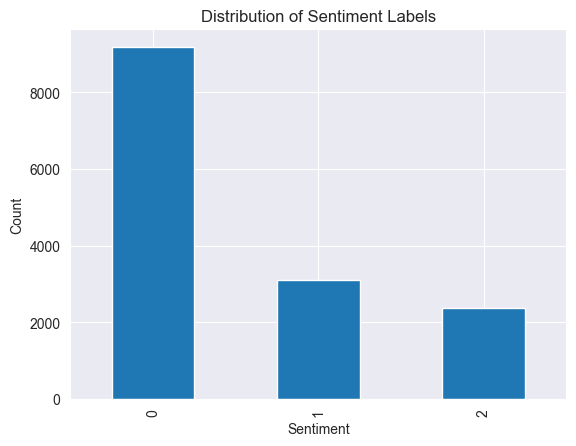

In [21]:
import matplotlib.pyplot as plt

# Plot distribution of sentiment labels
df['sentiment_encoded'].value_counts().plot(kind='bar')

plt.title('Distribution of Sentiment Labels')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [22]:
# Calculate the length of each cleaned review
review_lengths = df['cleaned_review'].str.len()

# Get a statistical summary of review lengths
print(review_lengths.describe())


count    14640.000000
mean        85.340574
std         35.596217
min          1.000000
25%         58.000000
50%         94.000000
75%        117.000000
max        165.000000
Name: cleaned_review, dtype: float64


In [23]:
# Set the maximum length for reviews
MAX_LENGTH = 120

# Truncate reviews longer than MAX_LENGTH
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x[:MAX_LENGTH])


In [24]:
# Set the minimum length for reviews
MIN_LENGTH = 55

# Pad reviews shorter than MIN_LENGTH
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.ljust(MIN_LENGTH))

In [25]:
print(df['cleaned_review'].apply(len).describe())

# Sample of truncated reviews
df[df['cleaned_review'].str.len() == MIN_LENGTH].sample(5)['cleaned_review']


count    14640.000000
mean        89.438934
std         25.950706
min         55.000000
25%         58.000000
50%         94.000000
75%        117.000000
max        120.000000
Name: cleaned_review, dtype: float64


4282     i need my confirmation number can you give it ...
11205    yeah i have been expecting the same for 3 hour...
2482     oh the wifi router is on top of the fuselage  ...
10250    worst experience ever                         ...
10976    we willsunday just a few days away            ...
Name: cleaned_review, dtype: object

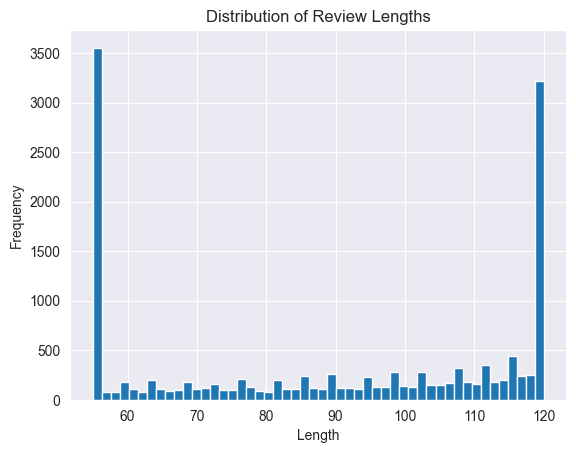

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['cleaned_review'].apply(len), bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5,stop_words='english')

matrix = vectorizer.fit_transform(df['cleaned_review'])

In [28]:
# Convert the matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.shape)

(14640, 2746)


Splitting the data

In [30]:
from sklearn.model_selection import train_test_split

# Features and labels
X = matrix  
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Verify the split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")


Training set size: (11712, 2746), (11712,)
Testing set size: (2928, 2746), (2928,)


In [32]:
# Review some sample data from the training set
print("Sample of cleaned reviews from training data:")
for i in range(5):  # Displaying first 5 samples
    print(f"Review {i+1}:")
    print(X_train[i])  # Print the feature vector
    print("Sentiment:", y_train.iloc[i])
    print()


Sample of cleaned reviews from training data:
Review 1:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 2746)>
  Coords	Values
  (0, 1825)	0.31985054037636507
  (0, 64)	0.514548935004731
  (0, 966)	0.374800675671721
  (0, 1726)	0.46536388020190467
  (0, 2112)	0.5252579726438175
Sentiment: negative

Review 2:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 2746)>
  Coords	Values
  (0, 939)	0.2725484558989805
  (0, 228)	0.3066916328511797
  (0, 1442)	0.29992672974811957
  (0, 1718)	0.3274293231439821
  (0, 801)	0.3911164279565062
  (0, 1383)	0.27755580979465044
  (0, 2314)	0.27668646131703584
  (0, 879)	0.26447541403602437
  (0, 776)	0.3584304039237046
  (0, 2187)	0.35987121574728614
Sentiment: negative

Review 3:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (1, 2746)>
  Coords	Values
  (0, 2102)	0.36691596875192295
  (0, 1309)	0.37924810861516645
  (0

In [33]:
# Review some sample text data (not the vectorized form)
print("Sample of cleaned reviews from training data:")
for i in range(5):  # Displaying first 5 samples
    print(f"Review {i+1}:")
    print(df.iloc[y_train.index[i]]['cleaned_review'])  # Print the actual text review
    print("Sentiment:", y_train.iloc[i])
    print()


Sample of cleaned reviews from training data:
Review 1:
you are offering us 8 rooms for 32 people fail         
Sentiment: negative

Review 2:
jfk nyc staff is amazing the lax sending an email with details but it was a disappointing experience
Sentiment: negative

Review 3:
well the last update was in the right direction at least ill keep my fingers crossed
Sentiment: positive

Review 4:
flight 3056 still sitting at dfw waiting for baggage to be loaded
Sentiment: negative

Review 5:
is your companion pass broken today purchaseerrorinvalidloyaltymemberaccountstatus sw9001vyil1xklrog24fs918ja
Sentiment: neutral



In [34]:
# To understand what words are associated with high values in the vector
feature_names = vectorizer.get_feature_names_out()  # Get feature names
dense = X_train[0].todense()  # Take the first sample and convert to dense matrix
denselist = dense.tolist()  # Convert to list
df_tfidf = pd.DataFrame(denselist, columns=feature_names)  # Create DataFrame

# Sort words by their TF-IDF score for the first review
sorted_words = df_tfidf.iloc[0].sort_values(ascending=False)
print("Top words in the first review:")
print(sorted_words.head(20))  # Show top 20 words


Top words in the first review:
rooms       0.525258
32          0.514549
offering    0.465364
fail        0.374801
people      0.319851
yest        0.000000
1230        0.000000
zone        0.000000
10          0.000000
100         0.000000
1024        0.000000
1030        0.000000
12          0.000000
wrote       0.000000
wtf         0.000000
wth         0.000000
wu          0.000000
ya          0.000000
yall        0.000000
yay         0.000000
Name: 0, dtype: float64


Initalizing naive base

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()

In [41]:
# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the resampled dataset
print(pd.Series(y_resampled).value_counts())


sentiment
negative    7289
positive    7289
neutral     7289
Name: count, dtype: int64
